In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sns.set_style('darkgrid')
sns.set_context('talk')

In [3]:
def newInds(inds, ablate):
    ablateGrouped = [np.sum(np.logical_and(ablate<inds[i+1], ablate>=inds[i])) for i in xrange(len(inds)-1)]
    return np.array(inds) - np.cumsum(np.insert(ablateGrouped, 0, 0))

def plotSpikes(spike_times, spike_ids, duration=None, N=None, lines=[], ablated=[]):
    x = spike_times
    y = spike_ids
    
    inds = np.logical_not(np.in1d(y, ablated))
    x, y = x[inds], y[inds]
    
    for i in xrange(y.shape[0]):
        y[i] -= np.sum(ablated<y[i])
    
    plt.scatter(x, y, s=5, c='k')
    
    if duration is None:
        xmax = np.max(x)
    else:
        xmax = duration
    if N is None:
        ymax = max(y)
    else:
        ymax = N
    
    c = sns.color_palette()
    for i in xrange(len(lines)):
        plt.plot([0, xmax], [lines[i], lines[i]], '--', color=c[i], lw=4);
    plt.ylabel('neuron #')
    plt.xlabel('time (s)')

    plt.xlim([0, xmax])
    plt.ylim([0, ymax])
    return plt.gca()

def beforeAndAfterPlot(scores, scoresPost, ablate, inds, labels=None, jitter=0):
    
    n = len(inds)-1
    
    if labels is None:
        l = n*['']
    else:
        l = labels
    
    scores_valid = np.delete(scores, ablate)
    
    # add jitter for visibility

    x = scores_valid + jitter*np.random.randn(len(scores_valid))
    y = scoresPost + jitter*np.random.randn(len(scoresPost))
    
    c = sns.color_palette('Set1', n)
    for i in xrange(n):
        i1, i2 = inds[i], inds[i+1]
        plt.scatter(x[i1:i2], y[i1:i2], c=c[i], label=l[i], lw=0)
        plt.scatter(np.mean(x[i1:i2]), np.mean(y[i1:i2]), c=c[i], lw=3, s=200)
    
    min_val = min((min(scores_valid), min(scoresPost)))-0.1
    max_val = max((max(scores_valid), max(scoresPost)))+0.1
    plt.plot([min_val, max_val], [min_val, max_val], 'k--')
    plt.ylim([min_val, max_val])
    plt.xlim([min_val, max_val])
    plt.xlabel('pre ablation')
    plt.ylabel('post ablation')
    if labels is not None:
        plt.legend(loc='upper left')

In [11]:
spike_times_post

array([ 0.    ,  0.    ,  0.    , ...,  2.9979,  2.9996,  2.9999])

In [126]:
ablated

array([  82,   34,  118,    0,  183,   40,   39,   87,  155,   25,   45,
        149,  182,   17,  198,   52,    9,   70,   72,  137,    5,  161,
        162,   93, 1281,   56,  169,   68,  123,  124])

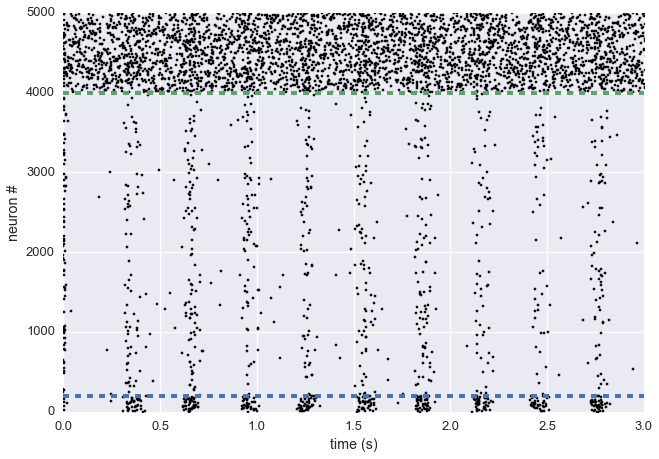

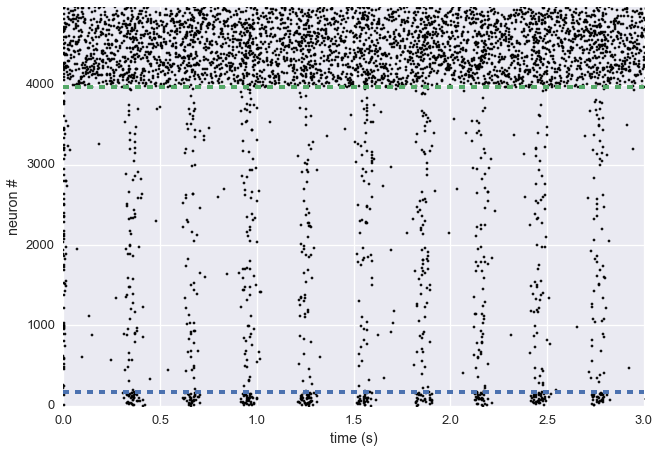

In [4]:
data = np.load('test/hs2-results.npz')
spike_times_pre, spike_ids_pre = data['spike_times_pre'], data['spike_ids_pre']
spike_times_post, spike_ids_post = data['spike_times_post'], data['spike_ids_post']
ablated = data['ablated']

inds_pre = [0, 200, 4000, 5000]
inds_post = newInds(inds_pre, ablated)

plotSpikes(spike_times_pre, spike_ids_pre, duration=3, N=inds_pre[-1], lines=inds_pre[1:-1])
plt.figure()
plotSpikes(spike_times_post, spike_ids_post, duration=3, N=inds_post[-1], lines=inds_post[1:-1], ablated=ablated)

In [140]:
monitor_pre = data['monitor_pre']
monitor_post = data['monitor_post']

(8000, 10000)

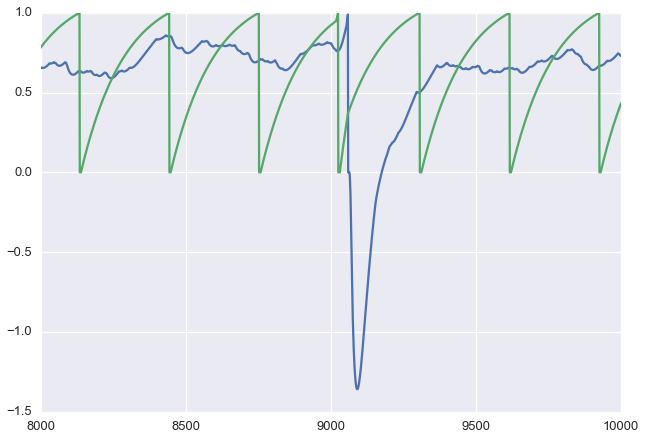

In [148]:
plt.plot(monitor_pre[0])
plt.plot(monitor_post[0])
plt.xlim([8000, 10000])

In [117]:
spike_scores_pre = data['spike_scores_pre']
spike_scores_post = data['spike_scores_post']

xc_scores_pre = data['xc_scores_pre']
xc_scores_post = data['xc_scores_post']

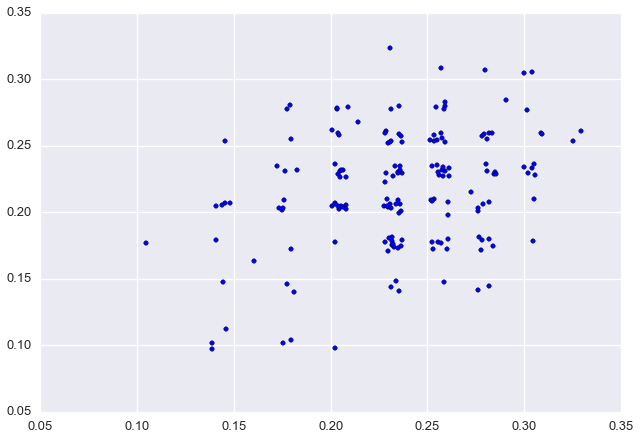

In [118]:
n = len(ablated)
jitter = 0.01*np.random.rand(2, 200-n)
plt.scatter(np.delete(xc_scores_pre[:200], ablated)+jitter[0], xc_scores_post[:200-len(ablated)]+jitter[1])

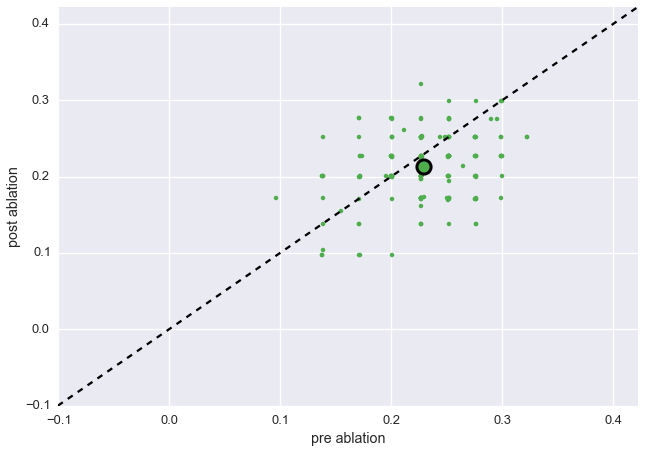

In [119]:
beforeAndAfterPlot(xc_scores_pre[:200], xc_scores_post[:200], ablated, [0, 0, 0, 170])

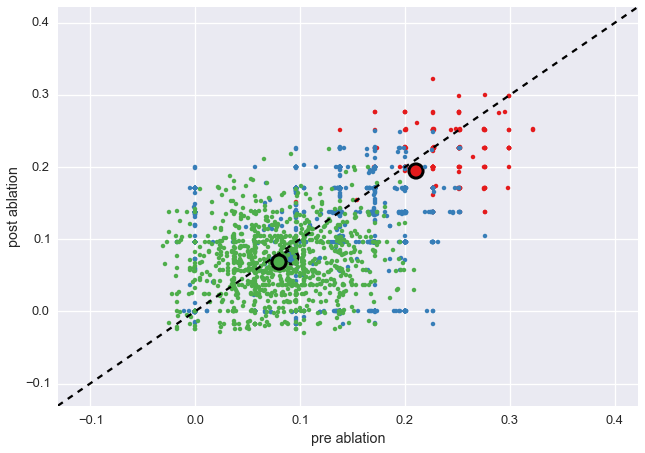

In [120]:
beforeAndAfterPlot(xc_scores_pre, xc_scores_post, ablated, [0, 200, 4000, 5000])

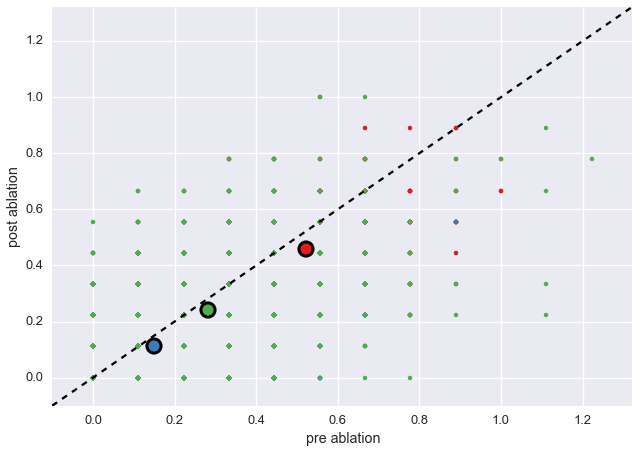

In [121]:
beforeAndAfterPlot(spike_scores_pre, spike_scores_post, ablated, [0,200,4000,5000])

In [44]:
from scipy.stats import beta

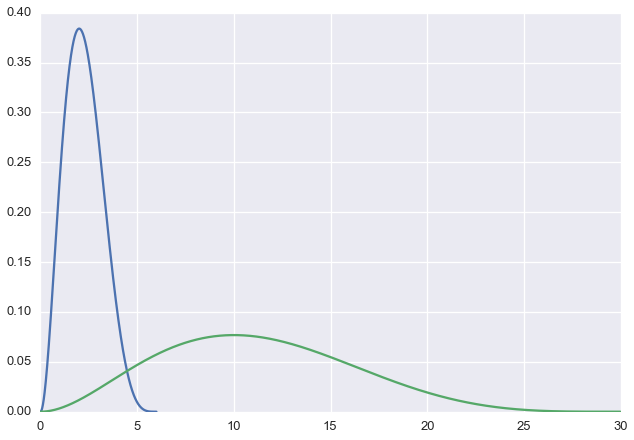

In [75]:
a, b = 3, 5
peak = 2
stretch_factor = 5

peak0 = 1.0*(a-1)/(a+b-2)
factor1 = peak/peak0
factor2 = stretch_factor * factor1

x = np.arange(0,1,.001)
y = beta.pdf(x, a, b)

plt.plot(factor1*x, y/factor1);
plt.plot(factor2*x, y/factor2);

In [152]:
[[f for f in r] for r in files]

[['hf', 'hs'], ['cf', 'cs']]

In [5]:
files = [['hf', 'hs', 'hs2'], ['cf', 'cs', 'cs2']]
data = [[np.load('./test/'+f+'-results.npz') for f in r] for r in files]

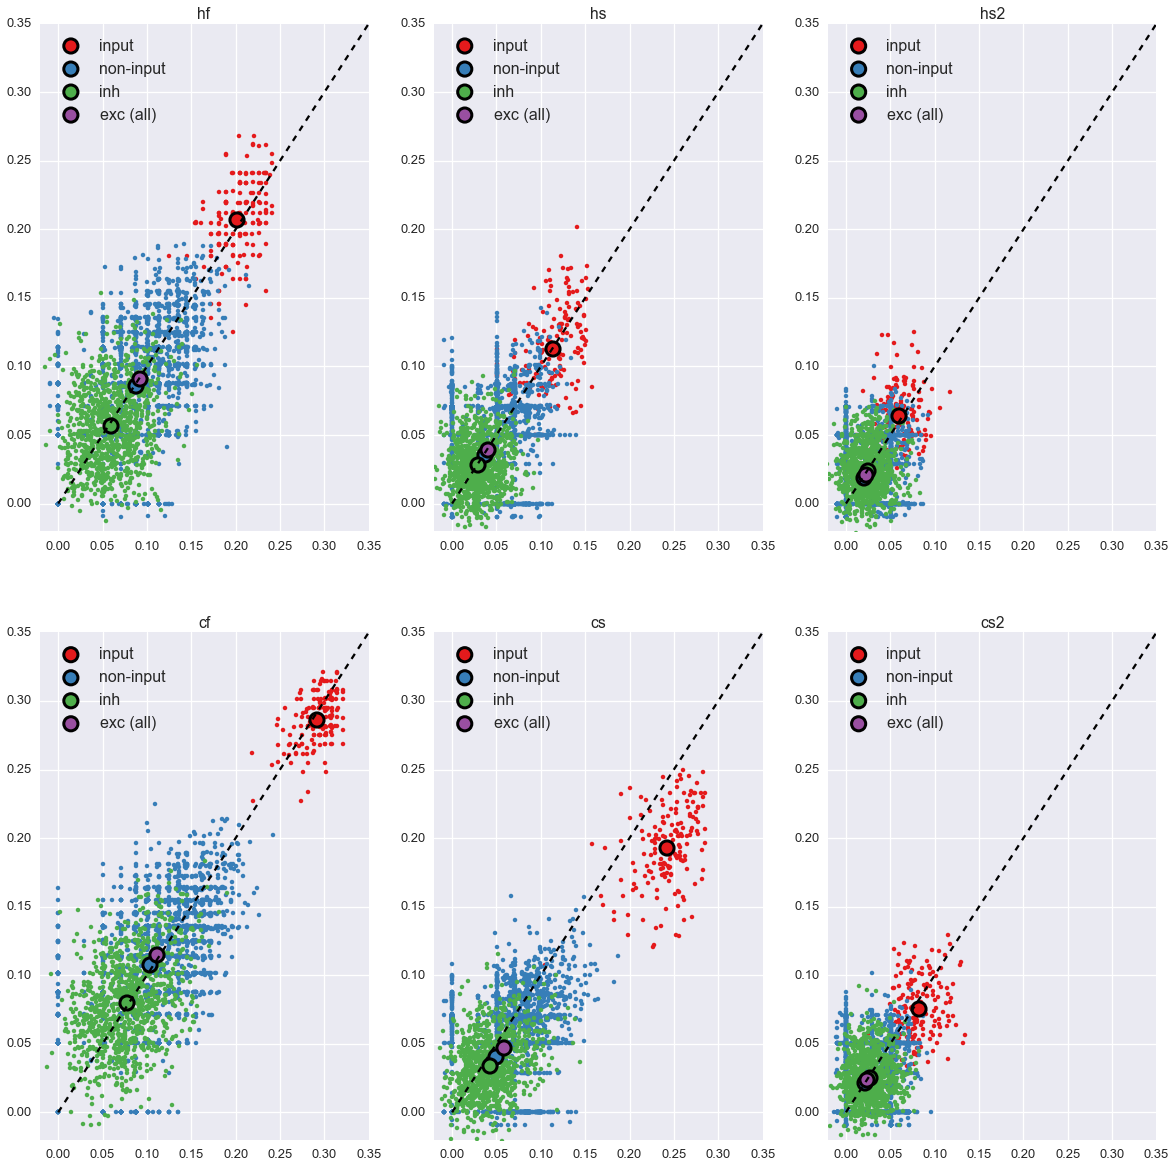

In [9]:
plt.figure(figsize=(20,20))
inds = [0, 200, 4000, 5000]
labels = ['input', 'non-input', 'inh', 'exc (all)']
c = sns.color_palette('Set1', 4)
for i in xrange(len(data)):
    for j in xrange(len(data[0])):
        
        scores_pre = data[i][j]['xc_scores_pre']
        scores_post = data[i][j]['xc_scores_post']
        ablated = data[i][j]['ablated']
        
        scores_pre = np.delete(scores_pre, ablated)
        nInds = newInds(inds, ablated)
        
        plt.subplot(2,3,3*i+(j+1))
        
        x = np.arange(0, 1, 0.1)
        plt.plot(x, x, 'k--')
        
        for k in xrange(len(nInds)-1):
            x = scores_pre[nInds[k]:nInds[k+1]]
            y = scores_post[nInds[k]:nInds[k+1]]

            plt.scatter(x, y, c=c[k], lw=0)
            
            plt.xlim([0, 0.4])
            plt.ylim([0, 0.4])
            plt.title(files[i][j])
            
        for k in xrange(len(nInds)-1):
            x = scores_pre[nInds[k]:nInds[k+1]]
            y = scores_post[nInds[k]:nInds[k+1]]
            plt.scatter(np.mean(x), np.mean(y), c=c[k], s=200, lw=3, label=labels[k])
            plt.xlim([-0.02, 0.35])
            plt.ylim([-0.02, 0.35])
            
        plt.scatter(np.mean(scores_pre[:nInds[2]]), np.mean(scores_post[:nInds[2]]),
                    c=c[3], s=200, lw=3, label=labels[3])
            
        plt.legend(loc=2, fontsize=16, markerscale=1)
        
plt.savefig('./test/scatters.eps')

hf
hs
cf
cs


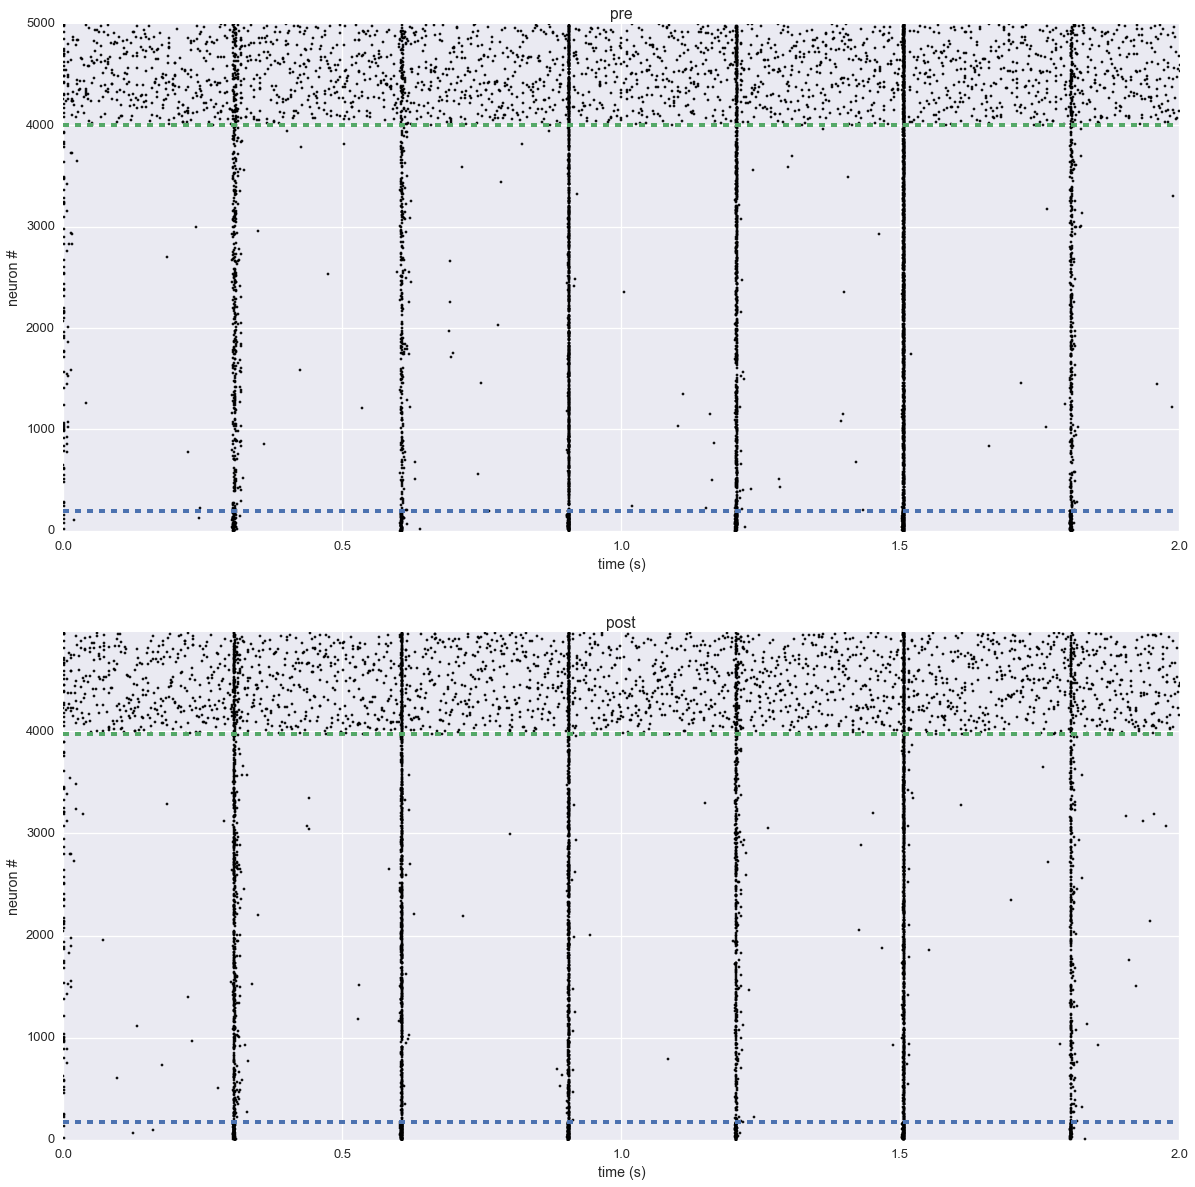

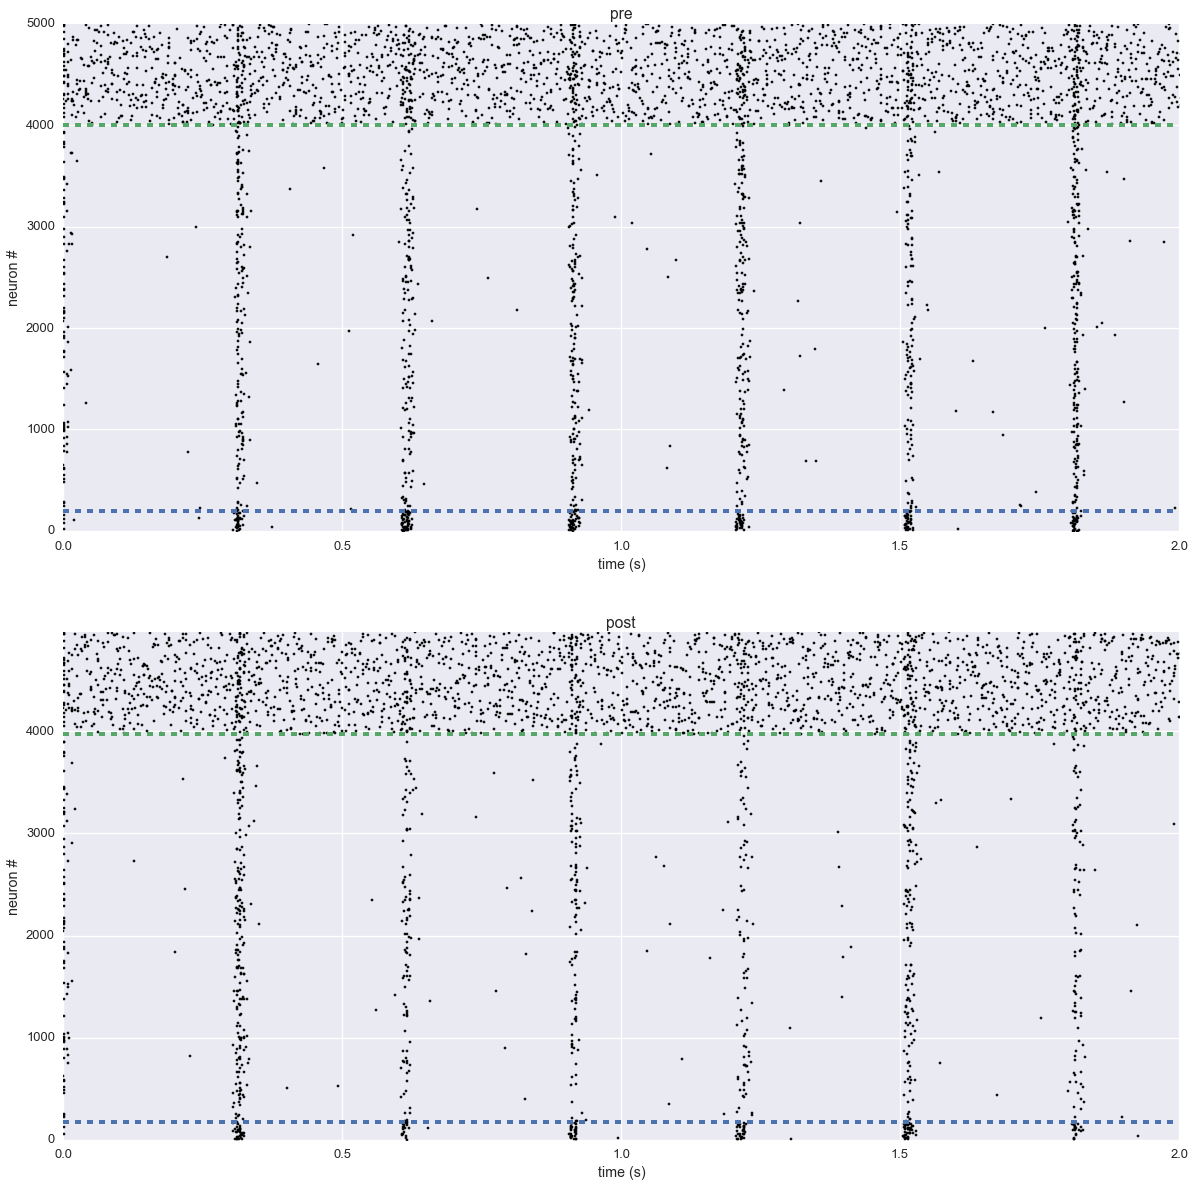

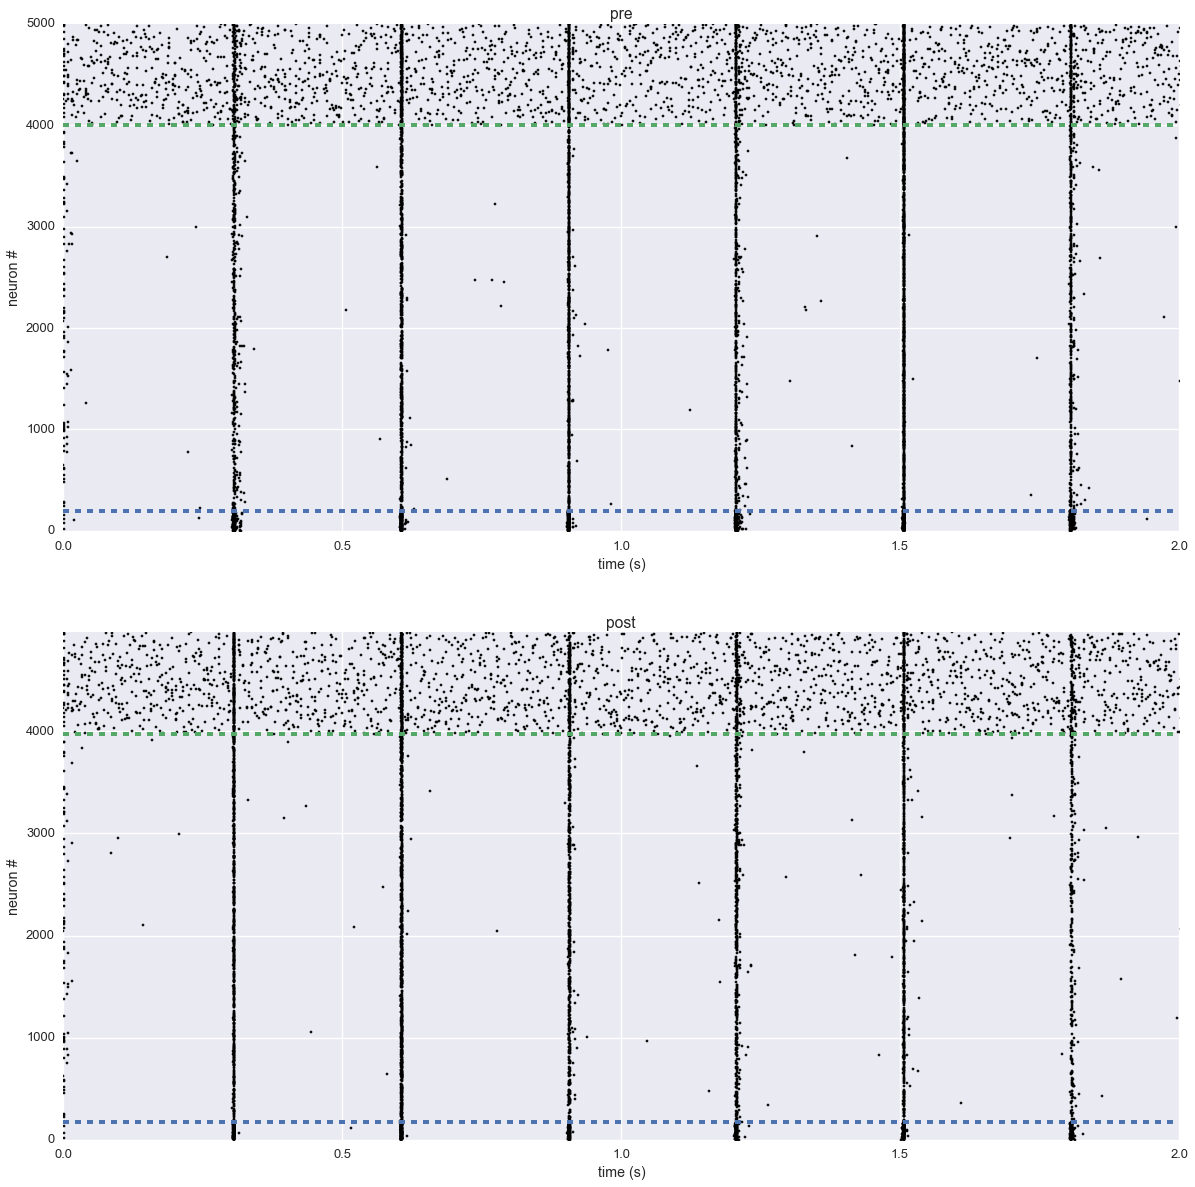

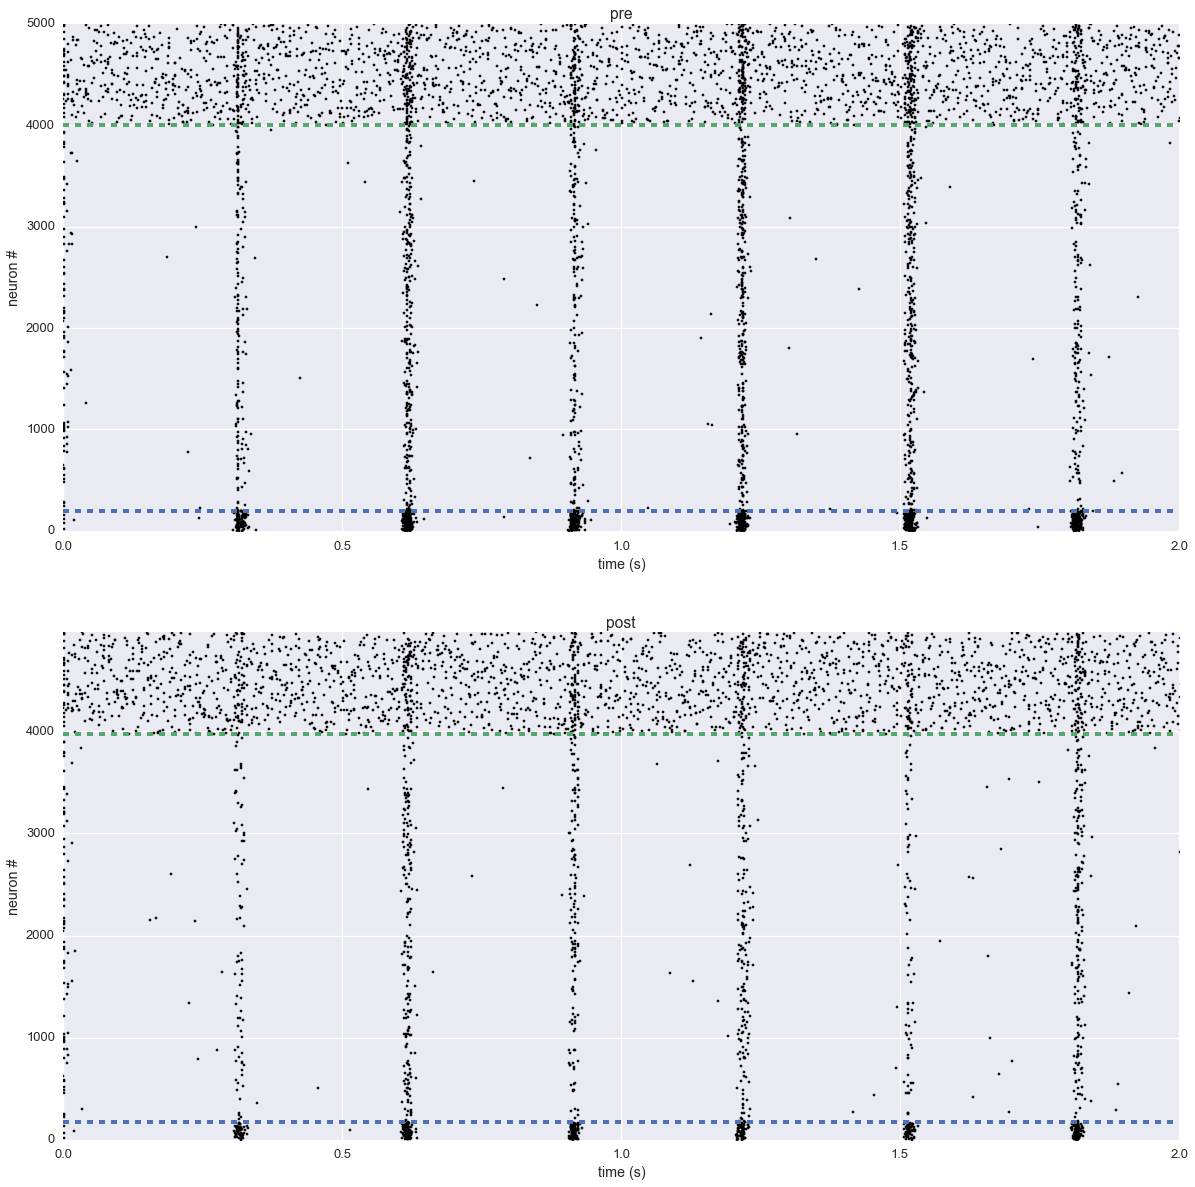

In [69]:
for i in xrange(len(data)):
    for j in xrange(len(data)):
        
        spikes_t_pre, spikes_i_pre = data[i][j]['spike_times_pre'], data[i][j]['spike_ids_pre']
        spikes_t_post, spikes_i_post = data[i][j]['spike_times_post'], data[i][j]['spike_ids_post']
        ablated = data[i][j]['ablated']
        
        print files[i][j]
        print '========================================================================'
        plt.figure(figsize=(20,20))
        plt.subplot(2,1,1)
        plotSpikes(spikes_t_pre, spikes_i_pre, duration=2, lines=inds[1:-1])
        plt.title('pre')
        plt.subplot(2,1,2)
        plotSpikes(spikes_t_post, spikes_i_post, duration=2, lines=nInds[1:-1], ablated=ablated)
        plt.title('post')
        #plt.show()
        plt.savefig('./test/'+files[i][j]+'-rasters.eps')
        